In [15]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import healpy as hp

In [18]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
fullmap = fits.open('./data/COM_CMB_IQU-smica_2048_R3.00_hm1.fits')
idata = fullmap[1].data["I_STOKES"]

fullmap has temperature (I) and polarization (Q,U) data as well. We can use this in the future to make nicer looking graphs if we want

In [34]:
# Check headers if you want
# fullmap[1].header;

Plotting spherical functions is very easy using healpy (python port of healpix)

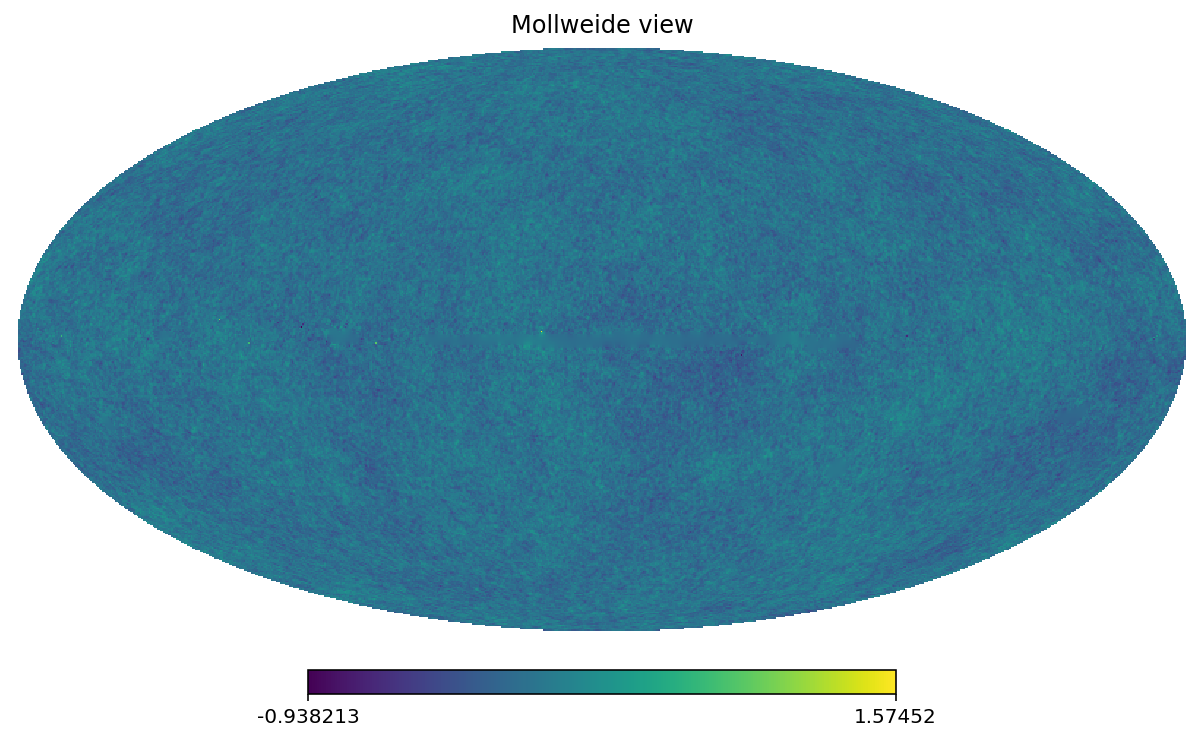

In [58]:
hp.mollview(idata*10**3, nest=True)

Data is given using "NESTED" ordering and we need it in "RING" (for anafast)

In [87]:
# Data is given using "NESTED" ordering
# we need it in RING to use anafast later on
ring_data = hp.reorder(idata*10**6, inp='NESTED', out='RING')

There is a lot of data! For testing purposes, lower the quality down but we should not use this when actually doing analysis!

In [88]:
# Leo - make sure you get it working with this line in place, 
# and then comment this out and see if you can get it working
# on ring_data directly. 
lesspretty = hp.ud_grade(ring_data, 512)

Anafast does the power spectrum job!

In [89]:
# Leo - This feels a bit cheaty but works wonders.
# If you have some time, try reading up on spherical 
# harmonics and we can work on our implementation.
# There is a "gal_cut" argument you can try playing 
# with to remove the blob in the center of the plot above.

clfast = hp.anafast(lesspretty)

In [90]:
# The first two are extremely small! Monopole/dipole term
# Get rid of them for plotting purposes
clclean = clfast[2:]
cleanlens = len(clclean)

For the $l\cdot(l+1)$ factor, are we assuming $m \geq 0$? Why $(l+1)$?

[]

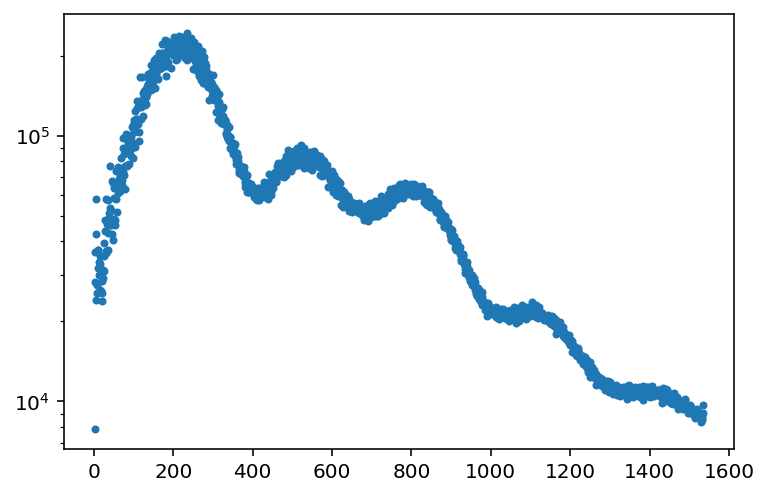

In [93]:
ls = np.arange(2,cleanlens+2)
plt.plot(ls, clclean*ls*(ls+1), '.')
plt.semilogy()
# plt.semilogx()